In [13]:
from Diffraction import *
import scipy.io

# Generate scattering

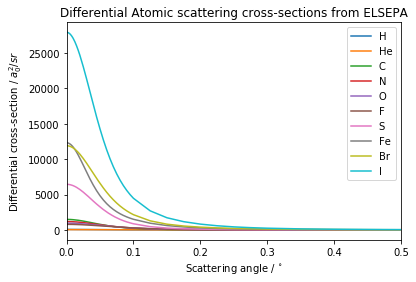

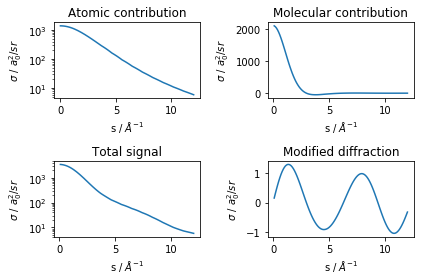

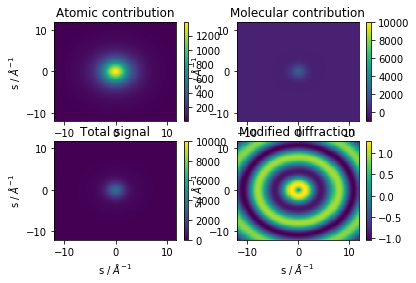

In [12]:
############################################################################################################
## Example code for diffraction of 1,3-cyclohexadiene ######################################################
############################################################################################################

geomName = 'NH3-GS'

# fname = 'CHD_6-31Gd.xyz'
fname = '%s.xyz' % geomName

CHD_geo = mol_geom(fname)

AtScatXSect = Atomic_Scattering_Cross_Sections()

# Figure showing atomic scattering cross-sections
plt.figure()
for element in AtScatXSect.supported_elements:
    exec('plt.plot(AtScatXSect.thetadeg,AtScatXSect.' + element + ", label='" + element + "')")

plt.title('Differential Atomic scattering cross-sections from ELSEPA')
plt.legend(loc='best')
plt.xlim(0,0.5)
plt.ylabel('Differential cross-section / $a_{0}^{2}/{sr}$')
plt.xlabel('Scattering angle / $^{\circ}$')


plt.savefig('%s-atomic.png' % geomName, bbox_inches = 'tight')

CHD_Diff = Diffraction(CHD_geo,AtScatXSect,Npixel=120.,Max_s=12)
CHD_Diff.make_1D_diffraction()

# Figure showing 1D diffraction
plt.figure()

plt.subplot(2,2,1)
plt.title('Atomic contribution')
plt.semilogy(CHD_Diff.s,CHD_Diff.I_at_1D)
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')

plt.subplot(2,2,2)
plt.title('Molecular contribution')
plt.plot(CHD_Diff.s,CHD_Diff.I_mol_1D)
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')

plt.subplot(2,2,3)
plt.title('Total signal')
plt.semilogy(CHD_Diff.s,CHD_Diff.I_mol_1D+CHD_Diff.I_at_1D)
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')

plt.subplot(2,2,4)
plt.title('Modified diffraction')
plt.plot(CHD_Diff.s,CHD_Diff.sM_1D)
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')
plt.tight_layout()

np.savez('%s-scat' % geomName, s=CHD_Diff.s, 
         totalSignal=CHD_Diff.I_mol_1D+CHD_Diff.I_at_1D,
         modifiedDiff=CHD_Diff.sM_1D)

scipy.io.savemat('%s-scat' % geomName, s=CHD_Diff.s, 
         totalSignal=CHD_Diff.I_mol_1D+CHD_Diff.I_at_1D,
         modifiedDiff=CHD_Diff.sM_1D)

plt.savefig('%s-1D-scat.png' % geomName, bbox_inches = 'tight')

CHD_Diff.make_2D_diffraction()

# Figure showing 2D diffraction. The limits of the color bar (vmin, vmax) will have to
# be adjusted for other molecules.
plt.figure()
plt.subplot(2,2,1)
plt.title('Atomic contribution')
plt.pcolormesh(CHD_Diff.sy,CHD_Diff.sz,CHD_Diff.I_at_2D)
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('s / $\AA^{-1}$')
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Molecular contribution')
plt.pcolormesh(CHD_Diff.sy,CHD_Diff.sz,CHD_Diff.I_mol_2D,vmin=-1000,vmax = 10000)
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('s / $\AA^{-1}$')
plt.colorbar()

plt.subplot(2,2,3)
plt.title('Total signal')
plt.pcolormesh(CHD_Diff.sy,CHD_Diff.sz,CHD_Diff.I_mol_2D+CHD_Diff.I_at_2D,vmin=0,vmax = 10000)
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('s / $\AA^{-1}$')
plt.colorbar()

plt.subplot(2,2,4)
plt.title('Modified diffraction')
plt.pcolormesh(CHD_Diff.sy,CHD_Diff.sz,CHD_Diff.sM_2D)
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('s / $\AA^{-1}$')
plt.colorbar()


plt.savefig('%s-2D-scat.png' % geomName, bbox_inches = 'tight')
plt.show()
